1. Chuẩn bị 

In [136]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Đọc dataset
df = pd.read_csv('shopping_trends.csv')

# Xem dữ liệu
df.head(5)


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


2. Kiểm tra 

In [137]:
# Kiểm tra kích thước dữ liệu
print("Shape of the dataset:", df.shape)

# Kiểm tra kiểu dữ liệu của các cột
df.info()

# Kiểm tra xem có giá trị nào bị thiếu không
df.isnull().sum()


Shape of the dataset: (3900, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

3. Kiểm tra dữ liệu thiếu 

In [138]:
# Kiểm tra xem có giá trị nào bị thiếu không
missing_values = df.isnull().sum()

# In ra các cột có giá trị bị thiếu
print(missing_values[missing_values > 0])


Series([], dtype: int64)


4. Tổng quan về " Subscription Status"

In [139]:
# Hiển thị các giá trị duy nhất trong cột "Subscription Status"
print(df['Subscription Status'].unique())


['Yes' 'No']


In [140]:
# Đếm số lượng mỗi giá trị của "Subscription Status"
print(df['Subscription Status'].value_counts())


Subscription Status
No     2847
Yes    1053
Name: count, dtype: int64


In [141]:
# Thông tin thống kê cơ bản về cột "Subscription Status"
print(df['Subscription Status'].describe())


count     3900
unique       2
top         No
freq      2847
Name: Subscription Status, dtype: object


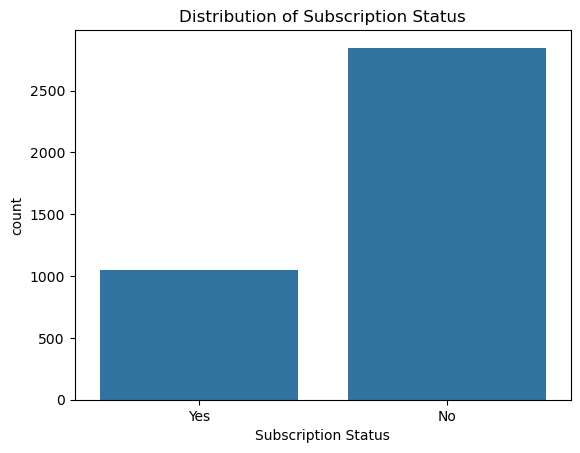

In [142]:
# Vẽ biểu đồ tần suất của cột "Subscription Status"
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Subscription Status', data=df)
plt.title('Distribution of Subscription Status')
plt.show()


5. Phân tích đa biến 

5.1 Tương quan "Subscription Status" và "Age"

In [143]:
# Xem độ tuổi nhỏ nhất và lớn nhất
min_age = df['Age'].min()
max_age = df['Age'].max()

print(f"Độ tuổi nhỏ nhất: {min_age}")
print(f"Độ tuổi lớn nhất: {max_age}")


Độ tuổi nhỏ nhất: 18
Độ tuổi lớn nhất: 70


In [144]:
# Chia độ tuổi thành các nhóm
bins = [18, 25, 35, 45, 55, 65, 70]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-70']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Hiển thị một vài dòng của cột Age và Age Group
df[['Age', 'Age Group']].head()


,Age,Age Group
0,55,56-65
1,19,18-25
2,50,46-55
3,21,18-25
4,45,46-55


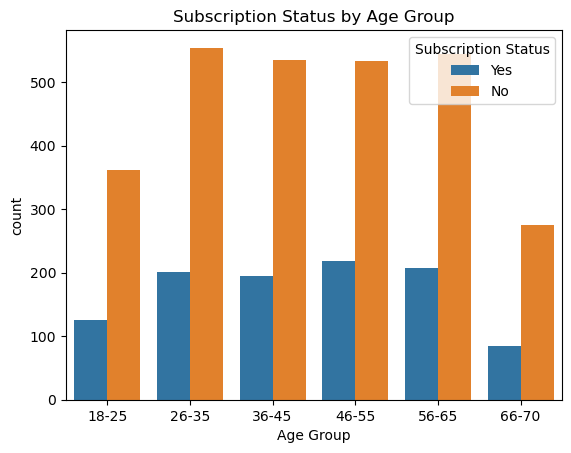

In [145]:
# Vẽ biểu đồ cột cho Age Group và Subscription Status
sns.countplot(x='Age Group', hue='Subscription Status', data=df)
plt.title('Subscription Status by Age Group')
plt.show()


Nhóm tuổi 18-25: Tỉ lệ khách hàng đăng ký có thể thấp hơn so với các nhóm tuổi lớn hơn, vì nhóm này có thể ít có khả năng tài chính hoặc ít quan tâm đến việc đăng ký dài hạn.
Nhóm tuổi 26-65: Đây có thể là nhóm có tỉ lệ đăng ký cao nhất, do nhóm này có thu nhập ổn định và có nhu cầu sử dụng nhiều dịch vụ.
Nhóm tuổi 66-70: Nhóm này có thể có tỉ lệ đăng ký thấp hơn vì họ ít có nhu cầu hoặc không quen với các dịch vụ trực tuyến.

5.2.Tương quan "Subscription Status" và "Gender"

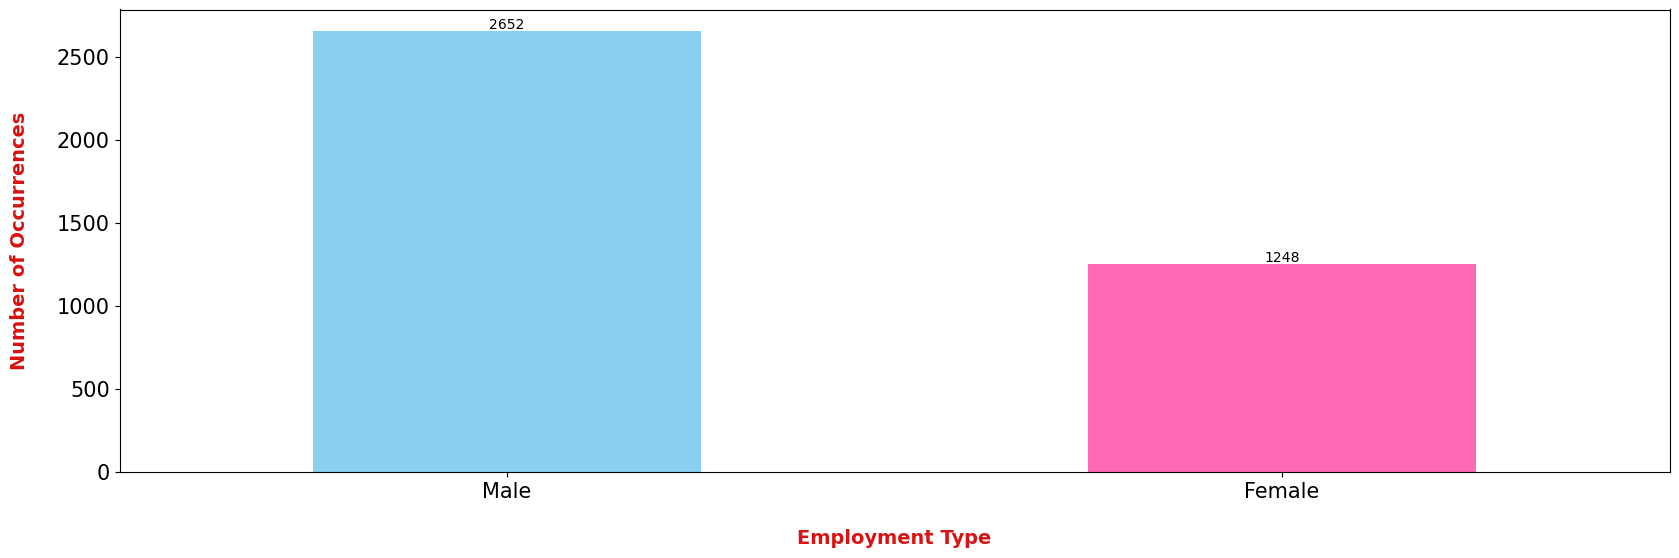

In [146]:
colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]
plt.figure(figsize = (20, 6))
ax = df["Gender"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Male', 'Female'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Employment Type', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

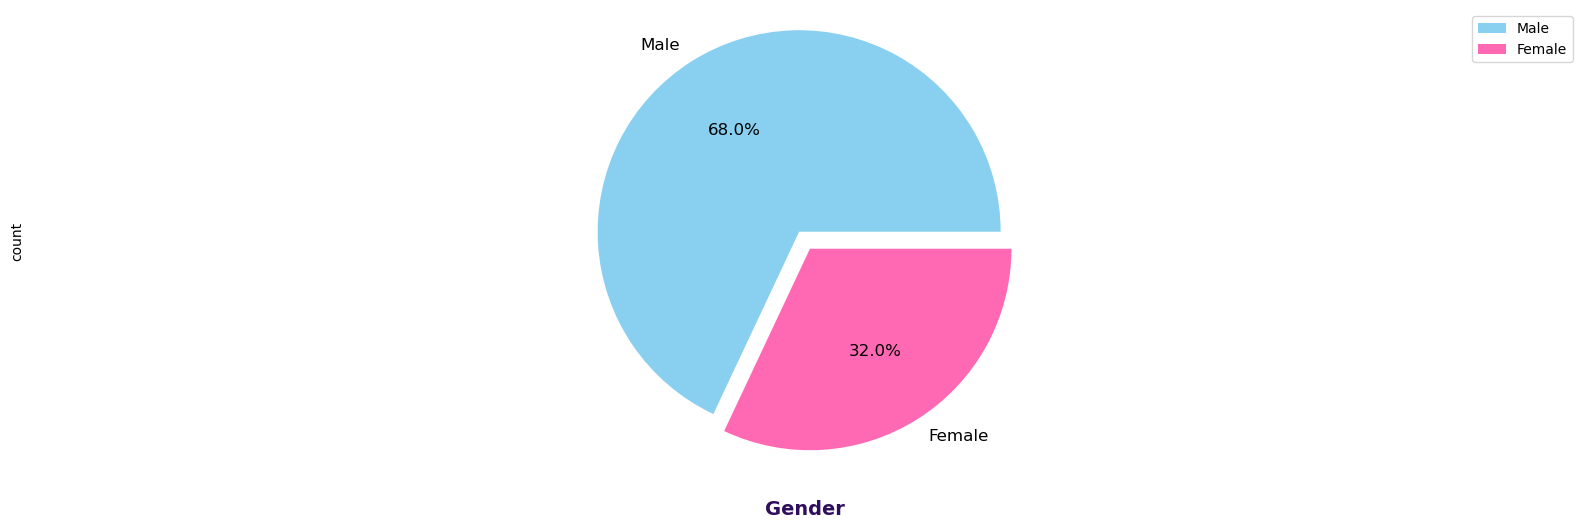

In [147]:
plt.figure(figsize = (20, 6))

counts = df["Gender"].value_counts()
explode = (0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Gender', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

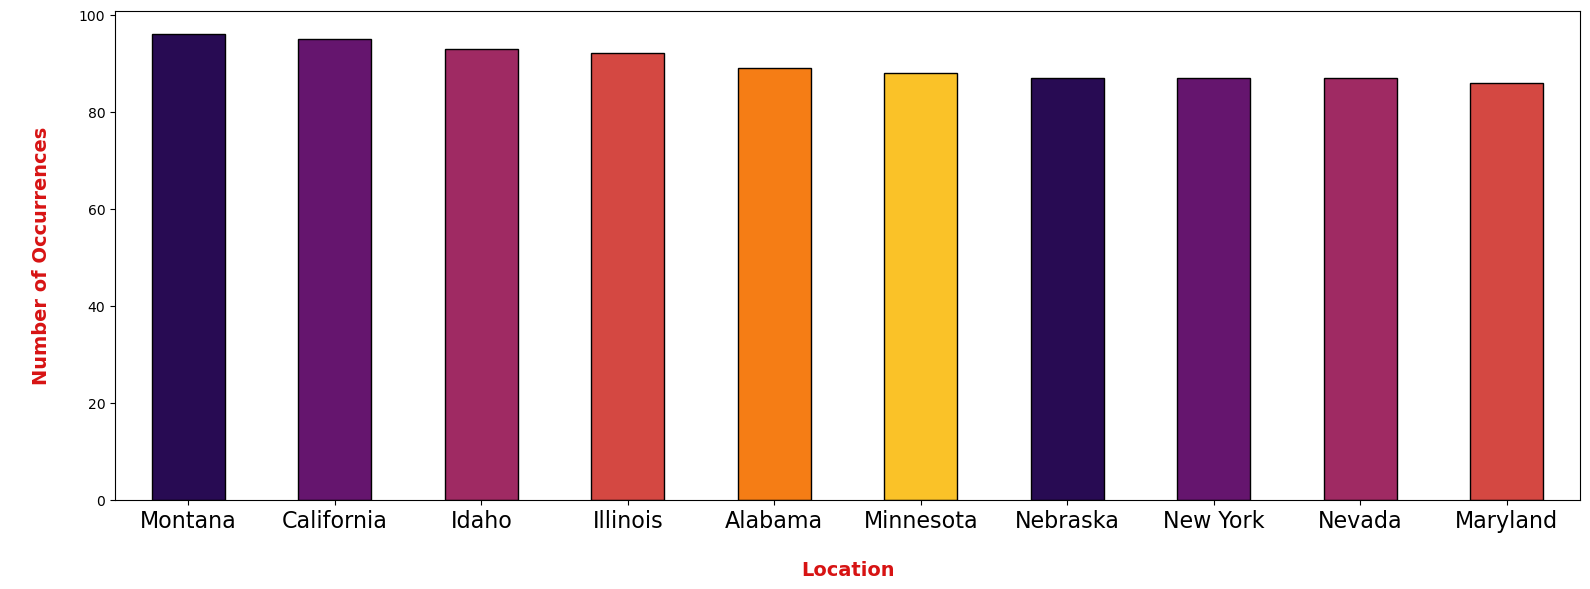

In [148]:
plt.figure(figsize = (16, 6))
df["Location"].value_counts()[:10].sort_values(ascending = False).plot(kind = 'bar', color = sns.color_palette('inferno'), edgecolor = 'black')
plt.xlabel('Location', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('\nNumber of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);
plt.xticks(rotation = 0, ha = 'center', fontsize = 16)
plt.tight_layout()
plt.show()

In [149]:
df["Size"].value_counts()

Size
M     1755
L     1053
S      663
XL     429
Name: count, dtype: int64

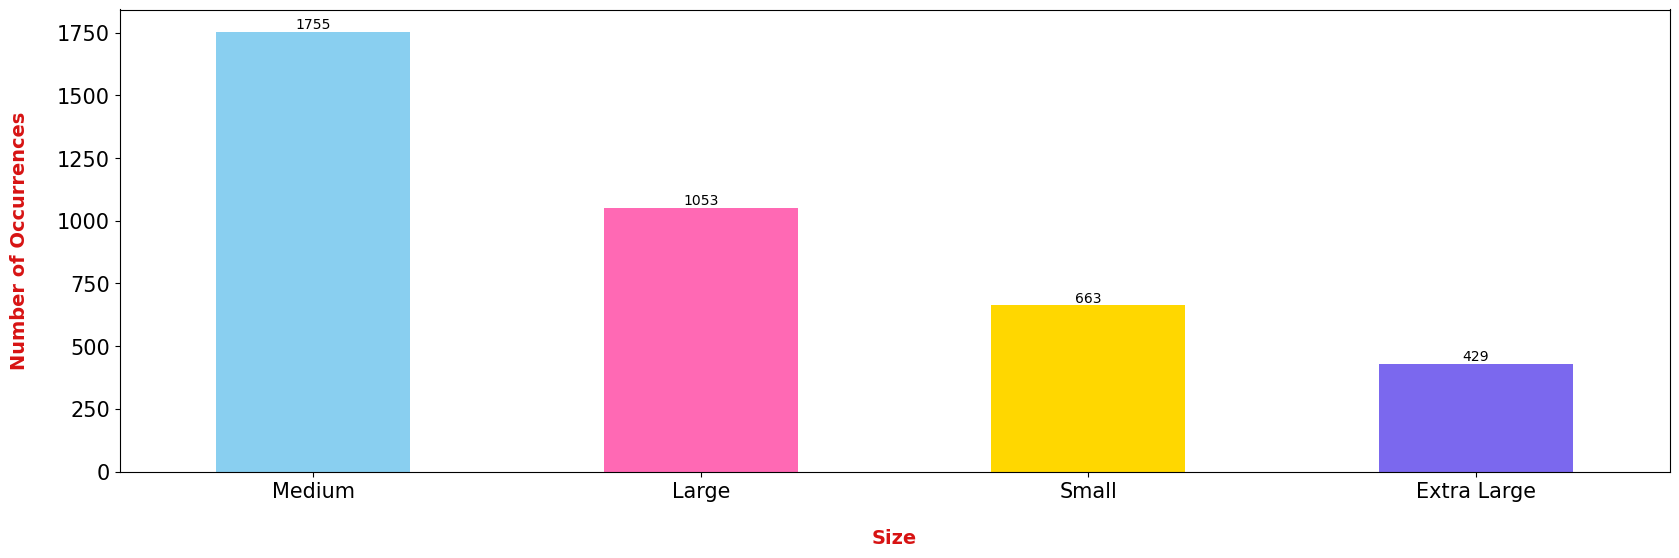

In [150]:
plt.figure(figsize = (20, 6))
ax = df["Size"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Medium', 'Large', 'Small', 'Extra Large'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Size', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

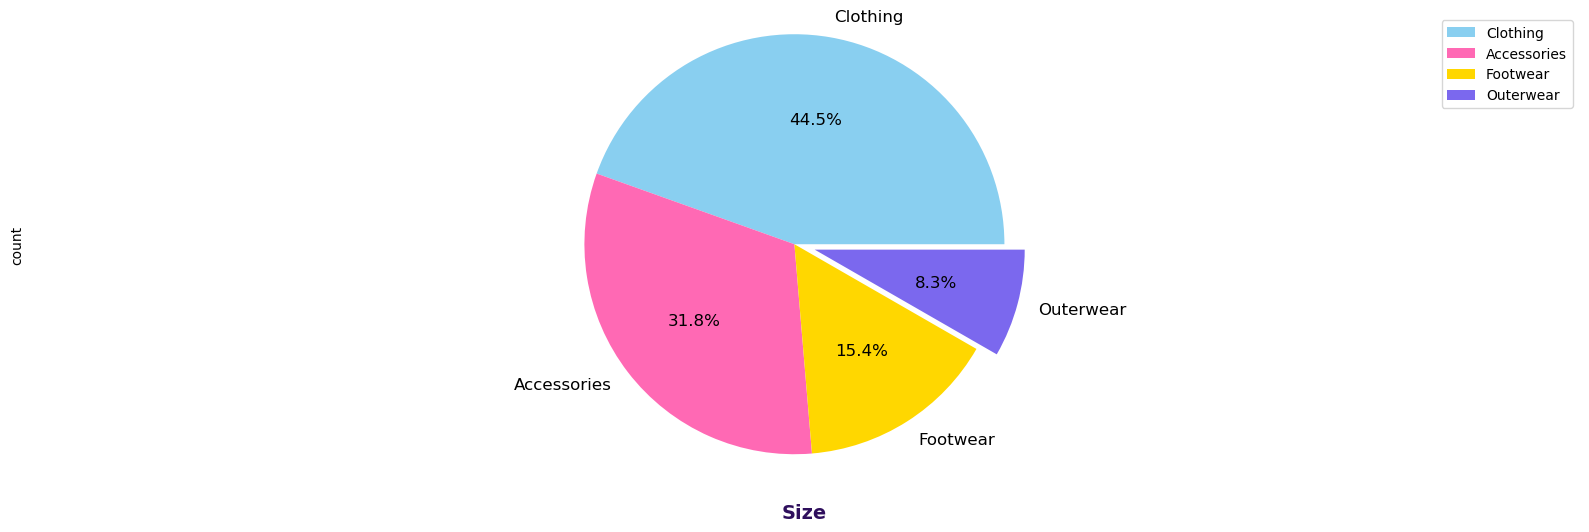

In [151]:
plt.figure(figsize = (20, 6))

counts = df["Category"].value_counts()
explode = (0, 0.0, 0.0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Size', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

In [152]:
df["Color"].value_counts()

Color
Olive        177
Yellow       174
Silver       173
Teal         172
Green        169
Black        167
Cyan         166
Violet       166
Gray         159
Maroon       158
Orange       154
Charcoal     153
Pink         153
Magenta      152
Blue         152
Purple       151
Peach        149
Red          148
Beige        147
Indigo       147
Lavender     147
Turquoise    145
White        142
Brown        141
Gold         138
Name: count, dtype: int64

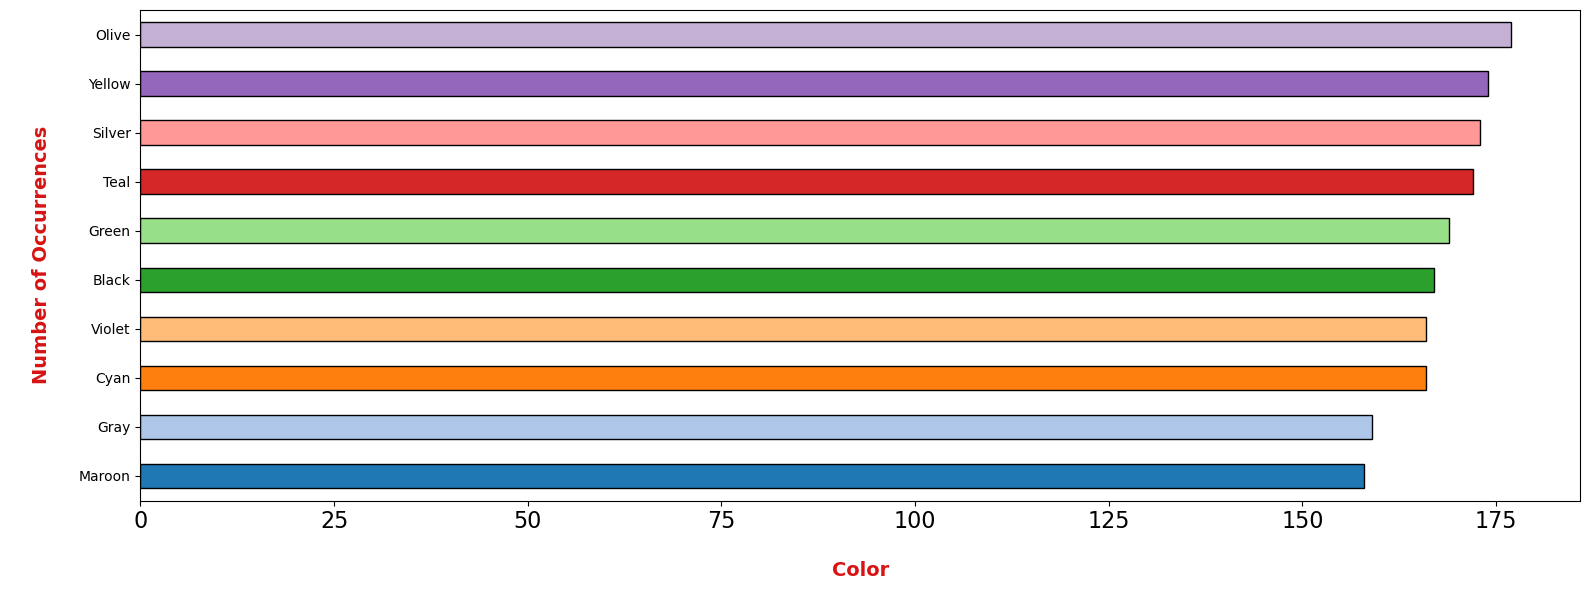

In [153]:
plt.figure(figsize = (16, 6))
df["Color"].value_counts()[:10].sort_values(ascending = True).plot(kind = 'barh', color = sns.color_palette('tab20'), edgecolor = 'black')
plt.xlabel('Color', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('\nNumber of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);
plt.xticks(rotation = 0, ha = 'center', fontsize = 16)
plt.tight_layout()
plt.show()

5.2.1. Nguyên nhân đến từ độ tuổi (Age) giữa 2 giới 
-> Không thể là nguyên nhân vì nhóm tuổi nào ở Female cũng đều có trạng thái đăng kí" No" 

5.2.2. Nguyên nhân đến từ "Purchase Amount"

In [154]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ tổng chi tiêu theo giới tính
total_spending_by_gender.plot(kind='bar', color=['blue', 'pink'])
plt.title('Total Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Purchase Amount (USD)')
plt.xticks(rotation=0)
plt.show()


NameError: name 'total_spending_by_gender' is not defined

-> Tổng chi tiêu của Male cao hơn Female, điều này có thể chỉ ra rằng Male có xu hướng chi tiêu nhiều hơn
-> Cũng là một nguyên nhân giải thích tình trạng đăng kí " Yes" ở Male cao hơn. 

5.2.3. Nguyên nhân đến từ "Review Rating"

In [626]:
min_RV = df['Review Rating'].min()
max_RV= df['Review Rating'].max()

print(f"Đánh giá thấp nhất nhất: {min_RV}")
print(f"Đánh giá cao nhất: {max_RV}")


Đánh giá thấp nhất nhất: 2.5
Đánh giá cao nhất: 5.0


In [627]:
# Hàm phân loại đánh giá vào nhóm
def categorize_review(rating):
    if rating < 3.5:
        return '2.5-3.5'  # Nhóm 1
    elif rating < 4.5:
        return '3.5-4.5'  # Nhóm 2
    else:
        return '4.5-5.0'  # Nhóm 3

# Áp dụng hàm phân loại cho cột Review Rating
df['Review Group'] = df['Review Rating'].apply(categorize_review)

# Tạo bảng tần suất giữa Review Group và Gender
gender_review_group_crosstab = pd.crosstab(index=df['Review Group'], columns=df['Gender'], margins=True, margins_name="Total")

print(gender_review_group_crosstab)  # Hiển thị bảng tần suất


Gender        Female  Male  Total
Review Group                     
2.5-3.5          487  1003   1490
3.5-4.5          497  1074   1571
4.5-5.0          264   575    839
Total           1248  2652   3900


In [628]:
# Tính tỷ lệ phần trăm cho từng nhóm đánh giá
gender_review_group_percentage = gender_review_group_crosstab.div(gender_review_group_crosstab.sum(axis=1), axis=0) * 100

print(gender_review_group_percentage)  # Hiển thị tỷ lệ phần trăm


Gender           Female       Male  Total
Review Group                             
2.5-3.5       16.342282  33.657718   50.0
3.5-4.5       15.817950  34.182050   50.0
4.5-5.0       15.733015  34.266985   50.0
Total         16.000000  34.000000   50.0


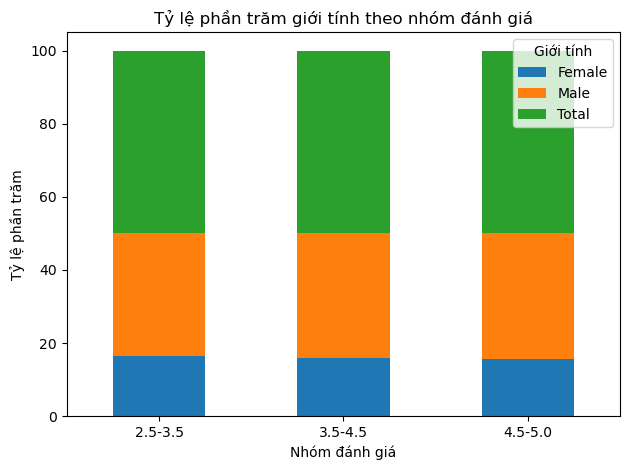

In [629]:
# Vẽ biểu đồ tỷ lệ phần trăm theo giới tính trong các nhóm đánh giá
gender_review_group_percentage = gender_review_group_percentage.drop('Total')  # Xóa hàng tổng

gender_review_group_percentage.plot(kind='bar', stacked=True)
plt.title('Tỷ lệ phần trăm giới tính theo nhóm đánh giá')
plt.xlabel('Nhóm đánh giá')
plt.ylabel('Tỷ lệ phần trăm')
plt.xticks(rotation=0)  # Xoay nhãn trục x cho dễ đọc
plt.legend(title='Giới tính')
plt.tight_layout()  # Căn chỉnh bố cục biểu đồ
plt.show()  # Hiển thị biểu đồ


-> Male cho thấy đánh giá tích cực (4.5-5.0) cao hơn Female-> Sự khác biệt trong Review Rating ở 2 giới có thể ảnh hưởng đến" Subscription Status"